In [1]:
import pandas as pd
import numpy as np

# import hdbscan

from tqdm import tqdm

from collections import Counter
from sklearn.cluster import KMeans, AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('final_data.csv', index_col=0)
data = data.fillna(0)
print(data.shape)
data.head()

(595542, 515)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,1% Lowfat Milk,100 Calorie Per Bag Popcorn,100% Raw Coconut Water,100% Recycled Paper Towels,...,ZBar Organic Chocolate Brownie Energy Snack,Crackers Cheddar Bunnies Snack Packs,days_since_first_order,reorders,organics,basket_size,num_orders,global_reorders,tx_purpose_weekly,tx_purpose_monthly
0,4,178520,36,1,9,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,231.0,10.0,0.0,13.0,58.0,12.0,1.0,0.0
1,5,156122,42,6,16,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,289.0,13.0,3.0,26.0,53.0,24.0,0.0,0.0
2,15,54901,51,3,11,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,152.0,19.0,1.0,5.0,99.0,3.0,0.0,0.0
3,18,118860,3,4,20,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,13.0,13.0,6.0,28.0,47.0,18.0,0.0,0.0
4,28,98256,29,3,13,6.0,1.0,0.0,0.0,0.0,...,0.0,0.0,128.0,32.0,7.0,16.0,81.0,8.0,0.0,0.0


In [3]:
c_cols = set(data.columns) - set(['order_dow', 'order_hour_of_day', 'days_since_prior_order', 'order_number', 'order_id', 'days_since_first_order', 'reorders', 'organics', 'basket_size', 'num_orders', 'global_reorders', 'tx_purpose_weekly', 'tx_purpose_monthly'])
mean_cols = ['days_since_prior_order', 'order_dow', 'order_hour_of_day', 'reorders', 'organics', 'basket_size', 'user_id', 'tx_purpose_weekly', 'tx_purpose_monthly']

In [4]:
c_data = data[c_cols].groupby('user_id').sum()

In [5]:
print(c_data.shape)
c_data.head()

(10000, 501)


,Shallot,YoBaby Blueberry Apple Yogurt,Aged White Cheddar Baked Rice & Corn Puffs Gluten Free Lunch Packs,Organic Thompson Seedless Raisins,Light Brown Sugar,Mini Original Babybel Cheese,Original Orange Juice,Organic Granny Smith Apple,Organic Macaroni Shells & Real Aged Cheddar,XL Emerald White Seedless Grapes,...,Organic Whole String Cheese,Oven Roasted Turkey Breast,Organic Heavy Whipping Cream,Organic Cheese Frozen Pizza,Organic Mango,Organic Red Bell Pepper,Organic Raspberries,Baby Arugula,Organic Cilantro,Organic Cauliflower
user_id,,,,,,,,,,,,,,,,,,,,,
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
54,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
mean_data = data[mean_cols].groupby('user_id').mean()

In [7]:
print(mean_data.shape)
mean_data.head()

(10000, 8)


,days_since_prior_order,order_dow,order_hour_of_day,reorders,organics,basket_size,tx_purpose_weekly,tx_purpose_monthly
user_id,,,,,,,,
27,4.373494,2.831325,12.518072,18.216867,0.879518,9.445783,0.060241,0.0
54,4.714286,3.428571,12.844156,40.285714,1.857143,8.038961,0.064935,0.0
90,3.402778,3.555556,12.083333,7.763889,0.250000,9.375000,0.055556,0.0
140,4.740260,3.129870,14.077922,45.389610,3.636364,15.246753,0.064935,0.0
152,5.507692,2.800000,14.292308,21.676923,2.276923,10.707692,0.092308,0.0


In [8]:
joined_data = pd.concat([c_data, mean_data], axis=1, copy=False)
# joined_data=(joined_data-joined_data.mean())/joined_data.std()
joined_data=(joined_data-joined_data.min())/(joined_data.max()-joined_data.min())

In [9]:
print(joined_data.shape)
joined_data.head()

(10000, 509)


,Shallot,YoBaby Blueberry Apple Yogurt,Aged White Cheddar Baked Rice & Corn Puffs Gluten Free Lunch Packs,Organic Thompson Seedless Raisins,Light Brown Sugar,Mini Original Babybel Cheese,Original Orange Juice,Organic Granny Smith Apple,Organic Macaroni Shells & Real Aged Cheddar,XL Emerald White Seedless Grapes,...,Organic Cilantro,Organic Cauliflower,days_since_prior_order,order_dow,order_hour_of_day,reorders,organics,basket_size,tx_purpose_weekly,tx_purpose_monthly
user_id,,,,,,,,,,,,,,,,,,,,,
27,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.176025,0.477679,0.484942,0.163212,0.053748,0.067588,0.073465,0.0
54,0.138889,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.190503,0.580086,0.502266,0.372178,0.113492,0.040847,0.079189,0.0
90,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.134787,0.601859,0.461845,0.064235,0.015278,0.066242,0.067751,0.0
140,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.191606,0.528869,0.567813,0.420506,0.222222,0.177851,0.079189,0.0
152,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.013333,...,0.0,0.0,0.224208,0.472308,0.579203,0.195975,0.139145,0.091574,0.112570,0.0


In [10]:
Sum_of_squared_distances = []
K = range(1,31)
for k in tqdm(K):
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(joined_data)
    Sum_of_squared_distances.append(km.inertia_)

100%|██████████| 30/30 [02:34<00:00,  5.15s/it]


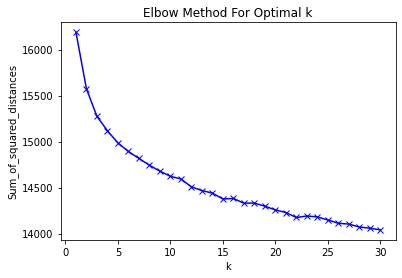

In [11]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
km = KMeans(n_clusters=11, random_state=0)
cluster_labels = km.fit_predict(joined_data)
joined_data['clusters'] = cluster_labels
joined_data['clusters'].value_counts()

5     2209
8     1909
10    1080
9     1003
3      812
7      768
0      633
2      486
6      439
4      354
1      307
Name: clusters, dtype: int64

In [13]:
# clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=2, cluster_selection_epsilon=500)
# cluster_labels = clusterer.fit_predict(joined_data.values)
# joined_data['clusters'] = cluster_labels
# joined_data['clusters'].value_counts()

In [39]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix


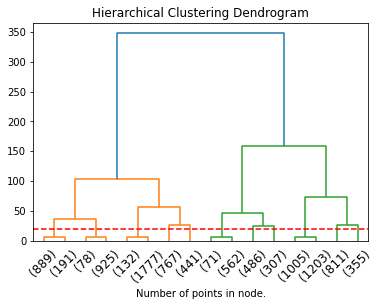

In [40]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(joined_data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
linkage_matrix = plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node.")
plt.xticks(rotation=45)
plt.axhline(y=20, color='r', linestyle='--')
plt.show()


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

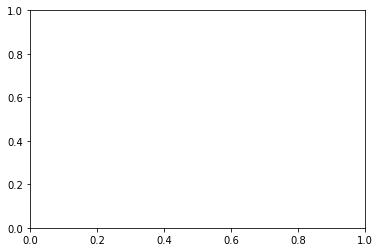

In [55]:
ax = ax = plt.gca()

ax.get_xticklabels()

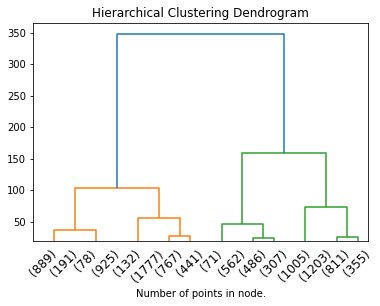

In [33]:
model = AgglomerativeClustering(n_clusters=11, compute_distances=True, compute_full_tree=False)
model = model.fit(joined_data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node.")
plt.xticks(rotation=45)
plt.ylim(bottom=20)
plt.show()


In [29]:
cluster_map = joined_data['clusters'].to_dict()

In [30]:
data['clusters'] = data['user_id'].map(cluster_map)

In [31]:
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,1% Lowfat Milk,100 Calorie Per Bag Popcorn,100% Raw Coconut Water,100% Recycled Paper Towels,...,Crackers Cheddar Bunnies Snack Packs,days_since_first_order,reorders,organics,basket_size,num_orders,global_reorders,tx_purpose_weekly,tx_purpose_monthly,clusters
0,4,178520,36,1,9,7.0,0.0,0.0,0.0,0.0,...,0.0,231.0,10.0,0.0,13.0,58.0,12.0,1.0,0.0,11
1,5,156122,42,6,16,9.0,0.0,0.0,0.0,0.0,...,0.0,289.0,13.0,3.0,26.0,53.0,24.0,0.0,0.0,7
2,15,54901,51,3,11,2.0,0.0,0.0,0.0,0.0,...,0.0,152.0,19.0,1.0,5.0,99.0,3.0,0.0,0.0,6
3,18,118860,3,4,20,6.0,0.0,0.0,0.0,1.0,...,0.0,13.0,13.0,6.0,28.0,47.0,18.0,0.0,0.0,6
4,28,98256,29,3,13,6.0,1.0,0.0,0.0,0.0,...,0.0,128.0,32.0,7.0,16.0,81.0,8.0,0.0,0.0,3


In [32]:
data.to_csv('final_data_clusters.csv')